In [1]:
%matplotlib inline

In [2]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from pkg_resources import resource_filename

(Something about stellar spectra here.)

In [3]:
# Load the data files for the F2 and A9 stars at solar metallicity
# Data were downloaded from https://zenodo.org/record/344471
f2_star_filepath = resource_filename('desihigh','dat/BinaryStarsSpec/spec-3683-55178-0798.FITS')
a9_star_filepath = resource_filename('desihigh','dat/BinaryStarsSpec/spec-7256-56658-0881.FITS')

f2_star_fits = fits.open(f2_star_filepath)
a9_star_fits = fits.open(a9_star_filepath)

# Masking the mutual wavelegnth coverage
wavelength = np.arange(3.5575, 4.0154, 0.0001)
f2_mask = np.in1d(f2_star_fits[1].data['loglam'], wavelength.astype('float32'))
a9_mask = np.in1d(a9_star_fits[1].data['loglam'], wavelength.astype('float32'))

f2_flux = f2_star_fits[1].data['flux'][f2_mask]
a9_flux = a9_star_fits[1].data['flux'][a9_mask]

# Get the combined flux
total_flux = f2_flux + a9_flux

Text(0.5, 0, 'Wavelength / $\\AA$')

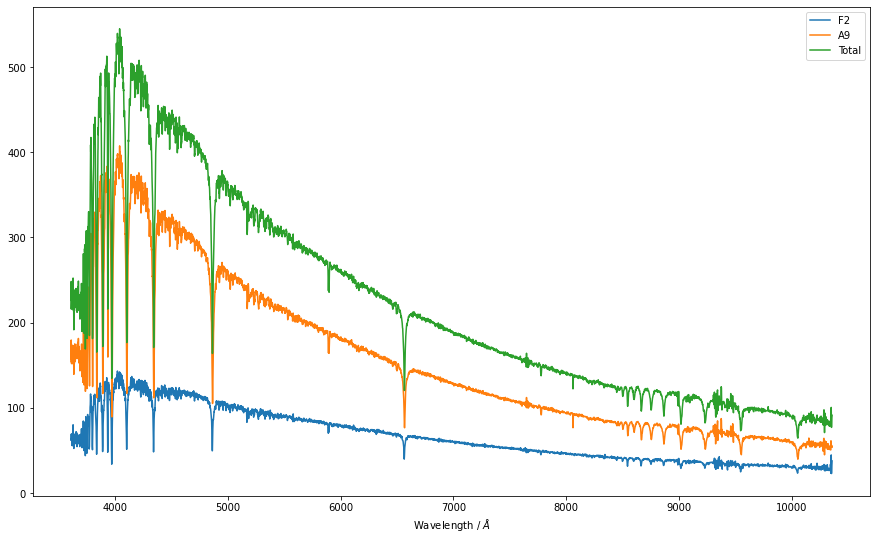

In [4]:
plt.figure(1, figsize=(15,9))
plt.plot(10.**(wavelength), f2_flux, label='F2')
plt.plot(10.**(wavelength), a9_flux, label='A9')
plt.plot(10.**(wavelength), total_flux, label='Total')
plt.legend()
plt.xlabel(r'Wavelength / $\AA$')

(Something about binary stars and circular orbits here. Kepler laws)
(Link to refresh doppler shift.)
(Qualitatively compare Redshift and RV)

In [5]:
# Compute the RV as a function of phase here

# https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt
# F2 - 1.46 solar mass
# A9 - 1.75 solar mass



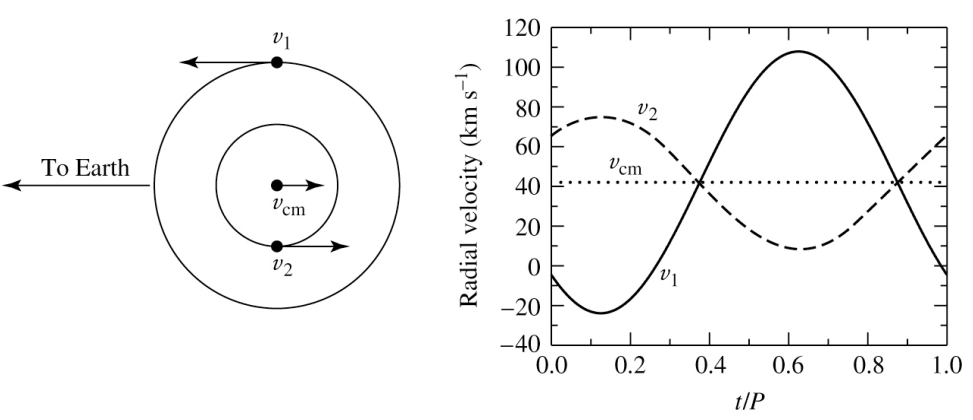
Image from http://burro.case.edu/Academics/Astr221/StarProp/speclipse.html

In [6]:
from astropy import constants
from astropy import units

M1 = 1.75 * constants.GM_sun # solar mass
M2 = 1.46 * constants.GM_sun # solar mass

a = 0.5 * constants.au # AU

# Kepler third law
Period = 2. * np.pi * np.sqrt(a**3. / (M1 + M2))

print('The orbital period between the two stars is {}.'.format(Period.to('day')))

The orbital period between the two stars is 72.07769956658142 d.


(If the system is perfectly side-on - largest possible RV)
(If the sytem is perpendicular to us - no RV)
(If the system is inclined to us - somewhere in the middle)

In [7]:
# velocity of the center of mass of the system
v_offset = 17.1 * units.km / units.s

# v1 / v2
v1_d_v2 = M2 / M1
# v1 + v2
v1_p_v2 = a * 2. * np.pi / Period

v2 = v1_p_v2 / (v1_d_v2 + 1)
v1 = v1_p_v2 - v2

print('The maximum velocity of the A9 star is {}.'.format(v1.to('km/s')))
print('The maximum velocity of the F2 star is {}.'.format(v2.to('km/s')))

The maximum velocity of the A9 star is 34.32483422123514 km / s.
The maximum velocity of the F2 star is 41.14278074463117 km / s.


Text(0, 0.5, 'km / s')

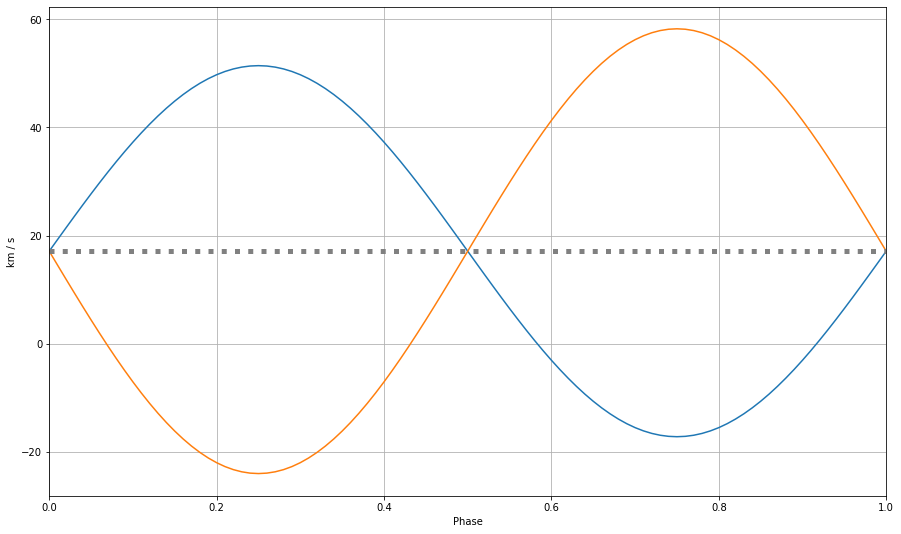

In [8]:
phase = np.arange(0, 1.01, 0.01)
plt.figure(2, figsize=(15, 9))
plt.plot(phase, np.sin(phase*2*np.pi)*v1.to('km/s') + v_offset)
plt.plot(phase, np.sin(phase*2*np.pi-np.pi)*v2.to('km/s') + v_offset)
plt.hlines(v_offset.value, 0, 1, ls=':', lw=5, color='grey')
plt.grid()
plt.xlim(0, 1)
plt.xlabel('Phase')
plt.ylabel('km / s')